In [1]:
import Crypto_PM as PM
import pandas_datareader as web
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import seaborn as sns


In [2]:
start = datetime(2020,1,1)
end = datetime.today()

<AxesSubplot:xlabel='Date'>

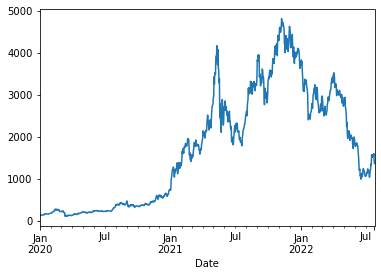

In [3]:
eth_prices = web.DataReader('ETH-USD', 'yahoo', start, end)
eth_prices['Close'].plot()

<AxesSubplot:xlabel='Date'>

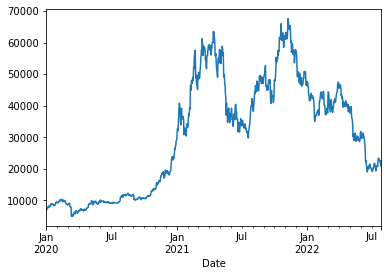

In [4]:
btc_prices = web.DataReader('BTC-USD', 'yahoo', start, end)
btc_prices['Close'].plot()

<AxesSubplot:xlabel='Date'>

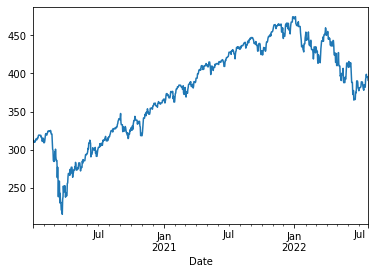

In [5]:
spy_prices = web.DataReader('SPY', 'yahoo', start, end)
spy_prices = spy_prices.resample('D').ffill() #resample to get all days instead of just trading days
spy_prices['Adj Close'].plot()

In [6]:
lp = PM.lp_value(pd.Series(eth_prices['Close']), 1000, 0.25)['lp_value_yield'] #create an LP position of ETH/USD

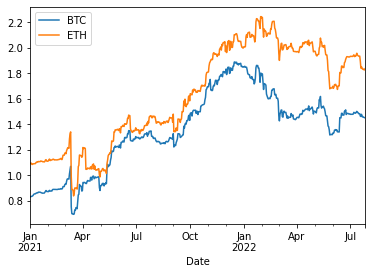

In [7]:
#rolling 12mo beta for BTC and ETH to SPY
beta_btc = btc_prices['Close'].pct_change().rolling(365).cov(spy_prices['Adj Close'].pct_change())/spy_prices['Adj Close'].pct_change().rolling(365).var()
beta_eth = eth_prices['Close'].pct_change().rolling(365).cov(spy_prices['Adj Close'].pct_change())/spy_prices['Adj Close'].pct_change().rolling(365).var()

beta_btc.dropna().plot(label='BTC')
beta_eth.dropna().plot(label='ETH')
plt.legend()

Text(0, 0.5, '$ Price')

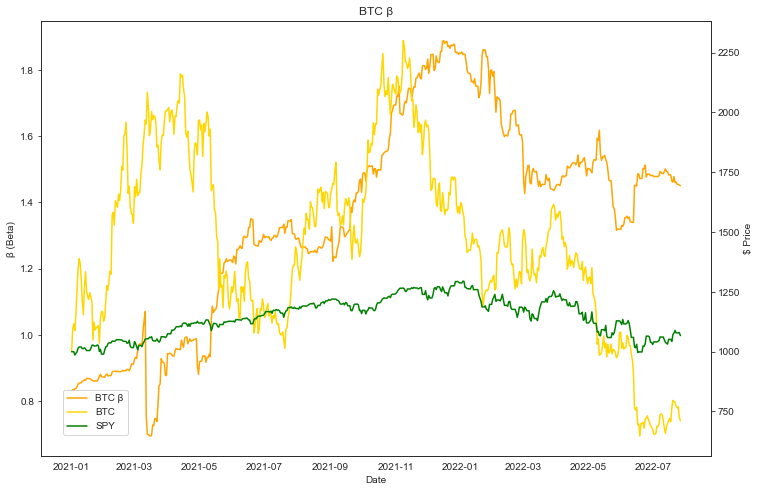

In [8]:
sns.set_style('white')
plt.rcParams["figure.figsize"] = [12, 8]
fig, ax1 = plt.subplots()
ax1.plot(beta_btc.loc["2021-01-01"::], color='Orange', label='Bitcoin β')
ax2 = ax1.twinx()
ax2.plot(btc_prices['Close'].loc["2021-01-01"::]/btc_prices['Close'].loc["2021-01-01"::].iloc[0]*1000, color='Gold', label='BTC')
ax3 = plt.plot(spy_prices['Adj Close'].loc["2021-01-01"::]/spy_prices['Adj Close'].loc["2021-01-01"::].iloc[0]*1000, color='Green', label='SPY')
fig.legend(['BTC β', 'BTC', 'SPY'], loc='center left', bbox_to_anchor=(0.145, 0.2))
plt.title("BTC β")
ax1.set_xlabel('Date')
ax1.set_ylabel('β (Beta)')
ax2.set_ylabel('$ Price')

Text(0, 0.5, '$ Price')

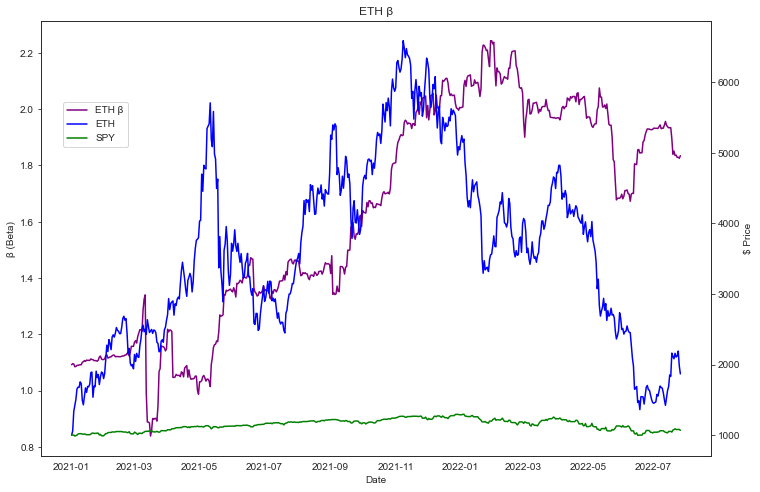

In [9]:
sns.set_style('white')
plt.rcParams["figure.figsize"] = [12, 8]
fig, ax1 = plt.subplots()
ax1.plot(beta_eth.loc["2021-01-01"::], color='Purple', label='Ether β')
ax2 = ax1.twinx()
ax2.plot(eth_prices['Close'].loc["2021-01-01"::]/eth_prices['Close'].loc["2021-01-01"::].iloc[0]*1000, color='Blue', label='ETH')
ax3 = plt.plot(spy_prices['Adj Close'].loc["2021-01-01"::]/spy_prices['Adj Close'].loc["2021-01-01"::].iloc[0]*1000, color='Green', label='SPY')
fig.legend(['ETH β', 'ETH', 'SPY'], loc='center left', bbox_to_anchor=(0.145, 0.7))
plt.title("ETH β")
ax1.set_xlabel('Date')
ax1.set_ylabel('β (Beta)')
ax2.set_ylabel('$ Price')

In [10]:
plt.style.use('default') #resetting to default params
sns.set_style('white')

In [11]:
#finding the Jensen Alpha of holding ETH versus SPY
PM.alpha_calc(eth_prices['Close'].loc['2021-01-01'::], spy_prices['Adj Close'])

Portfolio return: 0.4896868916988919
Benchmark return: 0.04245459524829487
Porfolio Beta: 1.8822245291035478


0.4097778111493884

In [12]:
#finding the Jensen Alpha of holding BTC versus SPY
PM.alpha_calc(btc_prices['Close'].loc['2021-01-01'::], spy_prices['Adj Close'])

Portfolio return: -0.19570962214542043
Benchmark return: 0.04245459524829487
Porfolio Beta: 1.5570975028422918


-0.26181556639072057

### Measuring a hypothetical token
Creating a portfolio based on a hypothetical token with a given return and variance and comparing LP positions of that token with a USD stable

<AxesSubplot:>

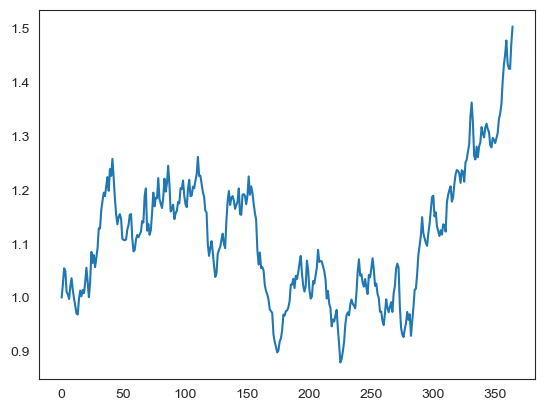

In [13]:
prices = pd.Series(PM.simple_forward_prices(1, 0.5, 0.02)) #create 365 days of prices for token with 50% return and 0.02 variance
prices.plot()

In [14]:
#create LP position of hypothetical token
lp = PM.lp_value(prices, 1000, 0.25)
lp

,lp_value,lp_value_yield,full_hodl,diverse_hodl
0,1000.000000,1000.611539,1000.000000,1000.000000
1,1012.382277,1013.620879,1024.917876,1012.458938
2,1026.895284,1028.780397,1054.513925,1027.256962
3,1024.465656,1026.973959,1049.529880,1024.764940
4,1005.266329,1008.343889,1010.560392,1005.280196
...,...,...,...,...
360,1197.965378,1493.799302,1435.121047,1217.560523
361,1193.925121,1489.671752,1425.457194,1212.728597
362,1193.602559,1490.180035,1424.687069,1212.343535
363,1212.987734,1515.307998,1471.339244,1235.669622


In [15]:
#create portfolio with 50% LP comp from hypothetical token
portfolio = PM.token_lp_portfolio(prices, 0.5, 0.25)

In [16]:
#Sharpe ratios of token, LP position, and 50/50 portfolio
print(f"Token Sharpe Ratio: {PM.sharpe_portfolio(prices, 0.02)}")
print(f"LP Token/USD Sharpe Ratio: {PM.sharpe_portfolio(lp['lp_value_yield'], 0.02)}")
print(f"50/50 Portfolio Sharpe Ratio: {PM.sharpe_portfolio(portfolio, 0.02)}")

Token Sharpe Ratio: 23.905133346158397
LP Token/USD Sharpe Ratio: 50.52441107725358
50/50 Portfolio Sharpe Ratio: 33.10840292751111


In [17]:
#Sortino ratios of token, LP position, and 50/50 portfolio
print(f"Token Sortino Ratio: {PM.sortino_portfolio(prices, 0.02)}")
print(f"LP Token/USD Sortino Ratio: {PM.sortino_portfolio(lp['lp_value_yield'], 0.02)}")
print(f"50/50 Portfolio Sortino Ratio: {PM.sortino_portfolio(portfolio, 0.02)}")

Token Sortino Ratio: 28.98071407461872
LP Token/USD Sortino Ratio: 52.337369640464814
50/50 Portfolio Sortino Ratio: 38.35103921411101
